In [1]:
import models.vae as auto
import torch
encoded_space_dim = 4  
fc2_input_dim = 128 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
autoencoder =auto.Autoencoder(encoded_space_dim=encoded_space_dim, fc2_input_dim=fc2_input_dim)
autoencoder.to(device)

Autoencoder(
  (encoder_cnn): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder_lin): Sequential(
    (0): Linear(in_features=288, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=4, bias=True)
  )
  (decoder_lin): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=288, bias=True)
    (3): ReLU(inplace=True)
  )
  (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
  (decoder_conv): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size

In [23]:
import torch
import torchvision
from torch.utils.data import DataLoader


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)

train_X = trainset.data.type(torch.FloatTensor) / 255.0
train_X = train_X.to(device)
train_y = trainset.targets.type(torch.FloatTensor).to(device)

test_X = testset.data.type(torch.FloatTensor) / 255.0
test_X = test_X.to(device)
test_y = testset.targets.type(torch.FloatTensor).to(device)

train_loader = DataLoader(list(zip(train_X, train_y)), shuffle=True, batch_size=32)
test_loader = DataLoader(list(zip(test_X, test_y)), shuffle=True, batch_size=32)


In [33]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-05)

n_epochs = 10
autoencoder.train()

for epoch in tqdm(range(n_epochs)):
    for X_batch, _ in train_loader:
        X_batch = X_batch.unsqueeze(1)

        output = autoencoder(X_batch)
        loss = loss_fn(output, X_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Finished epoch {epoch + 1}, latest loss {loss.item():.2f}')

 10%|█         | 1/10 [00:18<02:43, 18.17s/it]

Finished epoch 1, latest loss 0.03


 20%|██        | 2/10 [00:44<03:03, 22.95s/it]

Finished epoch 2, latest loss 0.03


 30%|███       | 3/10 [01:11<02:53, 24.73s/it]

Finished epoch 3, latest loss 0.03


 40%|████      | 4/10 [01:32<02:19, 23.20s/it]

Finished epoch 4, latest loss 0.03


 50%|█████     | 5/10 [01:51<01:49, 21.95s/it]

Finished epoch 5, latest loss 0.03


 60%|██████    | 6/10 [02:11<01:25, 21.27s/it]

Finished epoch 6, latest loss 0.02


 70%|███████   | 7/10 [02:31<01:02, 20.71s/it]

Finished epoch 7, latest loss 0.03


 80%|████████  | 8/10 [02:53<00:42, 21.27s/it]

Finished epoch 8, latest loss 0.02


 90%|█████████ | 9/10 [03:20<00:23, 23.06s/it]

Finished epoch 9, latest loss 0.03


100%|██████████| 10/10 [03:48<00:00, 22.86s/it]

Finished epoch 10, latest loss 0.03


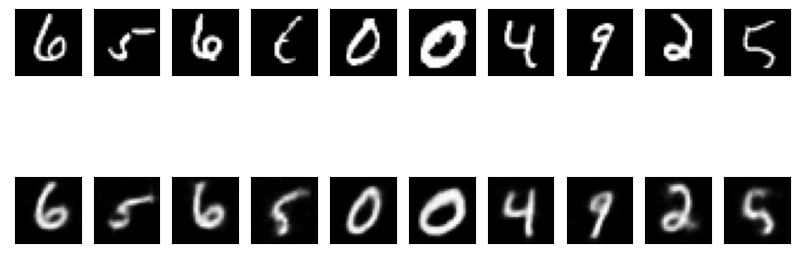

In [34]:
autoencoder.eval()

with torch.no_grad():
    data_iter = iter(test_loader)
    test_images, _ = next(data_iter)

    test_images = test_images.to(device)
    test_images = test_images.unsqueeze(1)

    reconstructed_test_images = autoencoder(test_images)

test_images = test_images.cpu().squeeze().numpy()
reconstructed_test_images = reconstructed_test_images.cpu().squeeze().numpy()


fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(10, 4))

for images, row in zip([test_images, reconstructed_test_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()

Lets try the same, but normalize it with torch like in the GAN examples

In [6]:
import torch
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = datasets.MNIST("MNIST_data/", download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

In [4]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-05)

n_epochs = 10
autoencoder.train()

for epoch in tqdm(range(n_epochs)):
    for img, _ in train_loader:

        output = autoencoder(img)
        loss = loss_fn(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Finished epoch {epoch + 1}, latest loss {loss.item():.2f}')

 10%|█         | 1/10 [00:29<04:21, 29.10s/it]

Finished epoch 1, latest loss 0.91


 20%|██        | 2/10 [00:57<03:50, 28.84s/it]

Finished epoch 2, latest loss 0.89


 30%|███       | 3/10 [01:28<03:28, 29.72s/it]

Finished epoch 3, latest loss 0.89


 40%|████      | 4/10 [02:00<03:02, 30.47s/it]

Finished epoch 4, latest loss 0.89


 50%|█████     | 5/10 [02:29<02:30, 30.20s/it]

Finished epoch 5, latest loss 0.89


 60%|██████    | 6/10 [02:59<02:00, 30.07s/it]

Finished epoch 6, latest loss 0.89


 70%|███████   | 7/10 [03:29<01:29, 29.89s/it]

Finished epoch 7, latest loss 0.87


 80%|████████  | 8/10 [03:58<00:59, 29.73s/it]

Finished epoch 8, latest loss 0.88


 90%|█████████ | 9/10 [04:28<00:29, 29.63s/it]

Finished epoch 9, latest loss 0.87


100%|██████████| 10/10 [04:56<00:00, 29.67s/it]

Finished epoch 10, latest loss 0.89


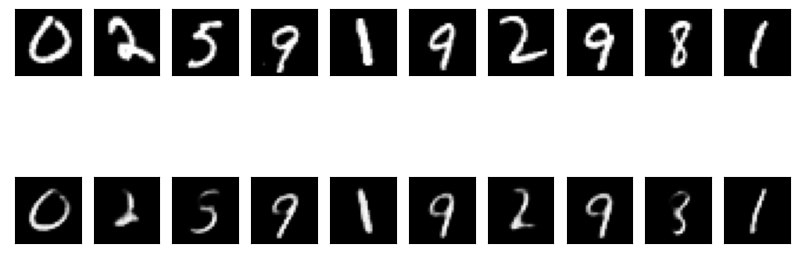

In [8]:
autoencoder.eval()

with torch.no_grad():
    data_iter = iter(test_loader)
    test_images, _ = next(data_iter)
    test_images = test_images.to(device)

    reconstructed_test_images = autoencoder(test_images)

test_images = test_images.cpu().squeeze().numpy()
reconstructed_test_images = reconstructed_test_images.cpu().squeeze().numpy()


fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(10, 4))

for images, row in zip([test_images, reconstructed_test_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()

The normaliziation with mean, std = 0.5 reconstruct it worse while the rest is identical (except I need to use unsqueeze one if I normalize it trough division by 255.0)

-> Maybe this will make the performnace of GAN also better?